**<center>Machine Learning 2</center>**
***<center>Learning Methods</center>***

<center>Snorre Ralund</center>

** Agenda **

* Introduction and overview of different learning methods: when are why we use them.

* Focus on handling practical issues such as: 
    * Improving performance 
    * label scarcity
        * Unbalanced classes and Rare classes
    * High variance data.
        * More features (N) than labeled samples (M) 
        * Sparse input.
        * Fat tailed feature distribution.


* Feature engineering by transfer learning from *auxilliary tasks* and *unsupervised learning* methods.
    * WordVec -- Doc2Vec. 
    * Topic Modelling


# Approaches to Learning
While the most famous ones (and least meaningful?) are Unsupervised and Supervised Learning, in practice there are other important theoretical approaches that are important to know about.


how to **x-->y**?
All are part of a the family of **functions**, **models**, **transformations**, **mappings** that converts and input to an output using more or less math and more or less hacky tricks. 

![](https://mathinsight.org/media/image/image/function_machine.png)

Now imagine our ML task as stacking these function machines, that each creates a new transformation

In [485]:
# stacked functions
def f(x):
    return x*2
def g(x):
    return x**2
def h(x):
    return x-3
stacked_functions = [f,g,h] # Imagine it as a machine learning pipeline
for x in range(5):
    xi = x
    for func in stacked_functions:
        xi = func(xi)
    print(x,xi)

0 -3
1 1
2 13
3 33
4 61


** Hand-coded Transformation - Feature engineering.**
* Defining Rules.
* removing features (e.g. stopwords)
* Functional transformations: polynomials, log, exp, sqrt.
* Graphbased measures (distances and similarities).


## Deep Models

**Ensemble learning**
* function1 --> output --> function2 --> output --> ...
![](https://qph.fs.quoracdn.net/main-qimg-b22447659f3f63822bc97ba3eff8a546-c)
* Stacking (use a set of classifiers as input to a meta-classifier).
    * No coordination in the training.
    * You can think of any independent step in your preprocessing and feature engineering as a form of stacking.
* ... stacking can increase ad infinitum to create deep models (e.g deep forests)
* Bagging (avoid overfitting by training many classifiers on different random samples)
* Boosting (combine classifiers trained sequentially to compensate for each others weaknesses)
    * Coordination, but no feedback during training of each classifier.
* [**AutoML**](https://github.com/EpistasisLab/tpot)
    * Search Algorithms: genetic programming, bayesian optimization.
    * Ensemble and stacking tricks, preprocessing.

** Deep Learning **
* Coordination and feedback between different functions.
    * function1 <--> output <--> function2
![](https://www.soasta.com/wp-content/uploads/2016/07/Google-ML-deep-learning.png)
* Trained via backpropagation (chain-rule of derivatives) of the gradient to each function (node - weight in the network). 
 

# Zero-shot, one-shot learning, or learning with label scarcity.
In many situations labels can be a scarce ressource, either because money is short, or because ***positive cases*** are rare (skewed distribution of classes). 
In this case we need to think about ways to overcome this problem. The following three approaches address this problem.

** Active Learning ** 
* Labeling and training at the same time.
    * Uncertainty sampling. Choosing which samples to be labeled.
    * ... ***FatML***: Expected error reduction: label sample to reduce the model's generalization error.
        * Finding samples that look different from what the model has already seen.

** Semi-supervised learning **
* Self training. Learning from your own labels. 
    * Throttling (adapt k new labels pr iteration)
    * Balancing (select only the most probable predicted labels)
* Degenerates if initial performance is too low. 
* Bad when input is sparse (so co-occurence is low).
* Problem with the generalization asssumption the bias is randomly and evenly distributed. However with high variance in the sample, and for domain adaptation this might actually help.

** Transfer Learning **
* Adapt information from models trained to perform a different task.
    * Fine-tuning.
    * A form of stacked learning.
    * Multi-task learning: If in a deep learning framework where tasks are co-trained. 
* Adapt information learned by unsupervised methods.

# Feature Engineering using Unsupervised Learning

This is a case of Stacked Learning, where we design a transformation of our input space, and hope that it will benefit our downstream application - i.e. Supervised Classification problem.

We transform an input in relation to a loss function that we hope relates our true loss function. 

Our theoretical understanding of the models should guide our search for socalled benificial *auxilliary tasks*. 

**Auxilliary tasks**:
   * (Word2Vec) Transform words to predict their *context* words : 
       * This is a catch-all modelling of co-occurence regularities, hopefully capturing both semantic, topical, ideological, and valence of words.
   * (Topic Modelling) Transform documents to a vector of latent datadriven topics, to help with our custom topic classification task.
   * Learn from big data collections with *Noisy* Labels
       * E.g. Tweets labeled with #sarcasm.
       * Social media posts labeled with emojis.
       --> and use the transformation as input in a sentiment classification task (Felbo et. al 2017)
       * Learning to predict the response of a Facebook Post (reactions, comments etc)--> might help us predict controversial and provocative statements.

## Word2Vec : Continuous embeddings
A famous and broadly used ***Auxilliary task***, is the task of predicting words from their context. And more precisely, transform a sparse input of one-hot-encoded words, into a dense continous representation (embedding) designed to predict words from their context.

The powerful technique has been used to model many other things than words - e.g. networks (Node2Vec) and sequences (Seq2Vec).

![](https://qph.fs.quoracdn.net/main-qimg-e8b83b14d7261d75754a92d0d3605e36)


## Example (network communities as a transformation)
* Imagine you have a Network represented by the following edgelist:[(Bob,Billy),(Bob, Adam),(Billy, Dan),(Billy, John), (John,Adam),(Bob,Anne)...]
* You want to **predict** the edges? 

If you knew the social groups organizing the network, then it would be easy, but how will you find these **latent** classes?

(In networks we look for communities), but here we call it a function, a transformation of each node into a latent class, "hidden" layer, that will be used to predict the edges. 
The simple prediction function will be, if Latent Class of Bob is equal to the Latent Class of Billy, predict edge.

Suppose each node is in more communities, then we might allow for each node to have more than one Class.

## example continued

* Instead imagine you see a set of social gatherings: [(Billy,Bob),(Billy,Dan,John),(Bob,Anne)]
* Now you want to predict who will **show up** given who is present (i.e. the Context).

Instead of using shared latent classes to predict the partipation, we might try to represent both the attracting and repulsing forces between the people. E.g. that Bob won't show up to a party when his Arch-Enemy Dan and his brother John is also present.

We represent each person in the following way:
Dan = [1,0,1], John = [1,0,1], Bob = [-1,1,-1] 
* <--- nb: we can represent these attracting and repulsing forces using continous embeddings. 

By calculating the dot product between these vectors, we can see that dot(Bob,Dan) is negative, and use that into a negative prediction. 



## example continued
The above intuition is very similar to the Word2Vec model. Words that attract/predict the same words, will be close in space.

Furthermore, it is not One word alone that predicts another, but a **"Gathering"** of words that predicts the missing word - i.e. a **Context** defined by a window. 

* Contious Bag of Words (CBOW): Models context as the Mean embedding of each word in the context.

![](https://www.tensorflow.org/images/softmax-nplm.png)

## How do we find the optimal embeddings?
** Impossible to search through all combinations.**
* Instead we randomly initialize a Vector (the embeddings) to define which dimensions each word will attract and repulse. And randomly initialize vector that defines which dimensions each word will be attracted to.
    * There are **two** Embeddings - hidden layers in deep learning lingo.
* Running through document with a window, we define our labeled examples (context-label pairs).
* Then we use gradient descent to optimize the embeddings of each word, maximizing the dot product between the context embedding (mean of all words in the context) and the word embedding. 
    - We use a softmax classifier to predict the Label (the true word missing from the context).

### Gradient descent 
For each parameter we estimate how it will effect our loss function if we change it - i.e. will it help our prediction or not? 

This is done by taking the derivative of the function $f(w)$ in relation to the parameter $w_i$ : $\frac{df(w)}{dwi}$ 

Then we update the parameter in relation to a stepsize *hyperparameter*.

**Stochastic Gradient Descent**: means that each update is done using only a sample (a batch) of the data to estimate the gradient.

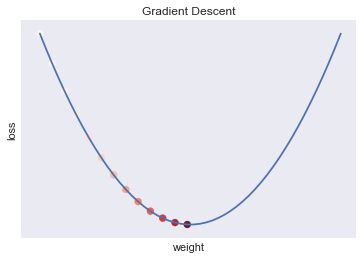

In [483]:
weight_space = np.linspace(-5,5,50)
loss = weight_space**2
plt.plot(weight_space,loss)
plt.scatter(weight_space[0:25][::2],loss[0:25][::2],c=loss[0:25][::-1][::2],cmap=plt.cm.Reds)
plt.xlabel('weight')
plt.ylabel('loss')
plt.xticks([])
plt.yticks([])
plt.title('Gradient Descent');

## Optimization algorithms
Given that the number of gradients to calculate is the main bottleneck, there are lots of different optimization algorithms. All vary over how they approximate the gradient and how they dynamically fix step size.

![](https://i.imgur.com/pD0hWu5.gif)

## Topic modelling
Another class of models transforming words and document into continous representations, although sparser, is topic models. We have already talked about them, but I wanted to add them here to test the performance. We focus here on the vanilla topic model: Latent Dirichlet Allocation (LDA).

Similar to the Naive Bayes classifier, LDA is also generative model in the bayesian framework. Here we also model the probability of a word given a label, however the labels are in this case latent classes infered by the model. 

Instead of using Gradient Descent, this method utilizes methods for sampling complex posterior distributions, in this case Gibbs Sampling. By putting in some heavy assumptions about the number of topics, the distribution of topics, the distribution of words accross topics, and their relationship, we can specify a posterier distribution to sample from, that will converge even from random initialization.

Consider document $i$, $(i =1, 2, ..., N)$.

Suppose there are $M_{i}$ total words and $\boldsymbol{x}_{i}$ is an $M_{i} \times 1$ vector, where $x_{im}$ describes the $m^{\text{th}}$ word used in the document$^{*}$

The model assumes $k$ topics.

$\boldsymbol{\theta}_{k} \sim \text{Dirichlet}(\boldsymbol{1})$

$\alpha_{k} \sim \text{Gamma}(\alpha, \beta) $

$\boldsymbol{\pi}_{i}|\boldsymbol{\alpha} \sim \text{Dirichlet}(\boldsymbol{\alpha}) $

$\boldsymbol{\tau}_{im}| \boldsymbol{\pi}_{i} \sim \text{Multinomial}(1, \boldsymbol{\pi}_{i})$

$x_{im} | \boldsymbol{\theta}_{k}, \tau_{imk}=1 \sim \text{Multinomial}(1, \boldsymbol{\theta}_{k})$

--> Generative model specified:

$ p(\boldsymbol{\pi}, \boldsymbol{T},\boldsymbol{\Theta}, \boldsymbol{\alpha}| \boldsymbol{X})  \propto p(\boldsymbol{\alpha}) p(\boldsymbol{\pi}| \boldsymbol{\alpha}) p(\boldsymbol{T}| \boldsymbol{\pi}) p(\boldsymbol{X}| \boldsymbol{\theta}, \boldsymbol{T})$



However it can be shown that we can just sample from the $\boldsymbol{\tau}_{im}$ word-topic assignment of each word of a given document. Which is defined by the shared probability distribution of document2topic distribution and overall the word2topic distribution. 

P(topic|w,document) = P(topic|w) * P(topic|document)

These probabilities can be simply counted from the current topic assignment of each word in each document:
* Count the proportions of words assigned to each topic normalized by number of words in the document. 
* For each word count the proportions of each topic normalized by number of documents it is present in ( - or occurrences, since a word occurring more than once in a document can be assigned to different topics). 

**Gibbs sampling**
Start with random parameters for each distribution, for each iteration you reasign each parameter with samples from the distribution defined by the current parameters.

By reassigning the topic assignment of each word-document pair based on this distribution, the distributions converges and slowly the topics emerge. 

## Topic modelling in python
While the Topic modelling research has been dominated by the R community, the Gensim Package is a alright alternative, although if you really like topic modelling I suggest you take a look at the STM and Quanteda R packages.

In [ ]:
corpus = [tokenizer.tokenize(doc) for doc in train_docs+test_docs] # First we tokenize our corpus
D = gensim.corpora.Dictionary(corpus) # A dictionary to index the words.
lda_corpus = [D.doc2bow(doc) for doc in corpus] # Then we convert the tokenized documents to Bag of Words.

In [ ]:
import logging # gensim progres can be seen using the logging package
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO  # ipython sometimes messes up the logging setup; restore

In [ ]:
#define number of topics and train the model
n_topics = 100
%time lda = gensim.models.LdaModel(lda_corpus,id2word=D,num_topics=n_topics,passes=20) # Other

In [ ]:
lda = gensim.models.LdaModel.load('lda_model')


Now lets look at what it has found and whether it corresponds witht the original classification scheme.

In [ ]:
x_lda = [lda[doc_bow] for doc_bow in lda_corpus]
def lda_to_dense(tuples,n_topics): # Convert the sparse lda vector to a dense vector
    vec = np.zeros(n_topics)
    for top,prob in tuples:
        vec[top] = prob
    return vec
x_lda = [lda_to_dense(tuples,n_topics) for tuples in x_lda]

In [ ]:
y_df = pd.concat([y_df_train,y_df_test]).reset_index()
y_df = y_df.drop('index',axis=1)
topic2label = {i:Counter() for i in range(n_topics)}
topic2count = Counter()
for num,xi in enumerate(x_lda):
    top = np.argmax(xi)
    topic2count[top]+=1
    row = y_df.iloc[num]
    topic2label[top].update(row[row!=0].keys())

In [ ]:
for top in sorted(topic2label,reverse=True,key=lambda x: topic2count[x])[0:10]:
    c = topic2label[top].copy()
    n = sum(c.values())
    ntop = topic2count[top]
    c = Counter({i:count/ntop for i,count in c.items()})
    print(top)
    print('words',end=': ')
    print(lda.show_topic(top))
    print('labels',end=': ')
    print(c.most_common(5),ntop/n,n)
    print()

Here we can see that just trusting the discovered topics has a fairly good precision in some cases and in others not so much. 

**Always** make sure you test the **Actual performance** of the Topic Model on **Hand-Labeled** examples, and not some weird artificial topic coherence measure**

In [ ]:
import pyLDAvis # Module for nice interactive viz of the topics.
import pyLDAvis.gensim

lda_df = pyLDAvis.gensim.prepare(lda, lda_corpus, D)
#lda_df[0]['topics'] = lda_df[0].index # PyLDAvis changes the topic index so it does not match gensim.


In [ ]:
pyLDAvis.display(lda_df)

In [ ]:
# As this is stacked learning, with no feedback between the processes we should try and experiment with the number of topics.
## However this is really costly. 
performance = []
import tqdm
##### ########## ########## ########## #####
##### DONT RUN UNLESS YOU HAVE TIME##### #####
##### ########## ########## ########## #####
for n_topics in tqdm.tqdm(range(75,150,5)): # TAKES ABOUT 5 hours to run
    lda_temp = gensim.models.LdaModel(lda_corpus,id2word=D,num_topics=n_topics,passes=20)
    x_lda = [lda_temp[doc_bow] for doc_bow in lda_corpus]
    x_lda = [lda_to_dense(tuples,n_topics) for tuples in x_lda]
    for name,x in [('lda',x_lda)]:
        xtrain = x[0:len(train_docs)]
        xtest = x[len(train_docs):len(docs)]
        for col in y_df_train.sum().sort_values().keys()[-50:]:
            y_train = y_df_train[col].values
            clf = sklearn.linear_model.LogisticRegression()
            clf.fit(xtrain,y_train)
            y_test = y_df_test[col]
            pred = clf.predict(xtest)
            scores = get_performance(pred,y_test)
            datapoint = {'type':name+'_%d'%n_topics,'task':col}
            datapoint.update(scores)
            performance.append(datapoint)

In [ ]:
#score_df = pd.DataFrame(performance)
#score_df.to_csv('topic_model_scores.csv',index=False)
score_df = pd.read_csv('topic_model_scores.csv')

In [609]:
#lda_top = score_df.groupby('task').max().reset_index()
#lda_top['type'] = 'lda_best'
#lda_top.to_csv('best_lda_score.csv',index=False)
lda_top = pd.read_csv('best_lda_score.csv')
lda_top = lda_top.merge(pd.DataFrame(list(y_df_train.sum().items()),columns=['task','size']),on='task')

# Application: Testing the gain of transfer learning on the Reuters dataset

In [16]:
# Load data
import pandas as pd 
import numpy as np
import gensim
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords, reuters
# List of document ids
documents = reuters.fileids()
 
# Load training data and test data
train_docs_id = list(filter(lambda doc: doc.startswith("train"),
                            documents))
test_docs_id = list(filter(lambda doc: doc.startswith("test"),
                           documents))
# Load categories

import pandas as pd
import numpy as np
categories = reuters.categories()
cat2index = {cat:num for num, cat in enumerate(categories)}
def process_categories(cats):
    "This function takes a list of named categories and converts them into a sparse indicator vector."
    vec = np.zeros(len(cat2index))
    for cat in cats:
        idx = cat2index[cat]
        vec[idx] = 1
    return vec
def make_y(fileids):
    y_mat = []
    for doc in fileids:
        y_mat.append(process_categories(reuters.categories(doc)))
    return pd.DataFrame(y_mat,columns=categories)
y_df_train = make_y(train_docs_id)
y_df_test = make_y(test_docs_id)
# Documents
train_docs = [reuters.raw(doc_id) for doc_id in train_docs_id]
test_docs = [reuters.raw(doc_id) for doc_id in test_docs_id]
# lemmatizing
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize(words):
    pos_doc = nltk.pos_tag(words)
    pos_doc = [(word,get_wordnet_pos(tag)) for word,tag in pos_doc]
    return [lemmatizer.lemmatize(word,tag) if tag!='' else word for word,tag in pos_doc]
#### NORMALIZATION+TOkenization
# Define stopwords
from nltk.corpus import stopwords
stop_words_nltk = set(stopwords.words('english')) # remember to define as set for performance
#own_stop_words = set(["the","it","she","he", "a","trump",'idiot','failure','weak']) # Define your own list of stopwords

#The stemmers and lemmers need to be initialized before being run
porter = nltk.stem.porter.PorterStemmer() # 
snowball = nltk.stem.snowball.SnowballStemmer('english') # a greedy stripper
# Normalization using a Class 
class custom_tokenizer():
    def __init__(self,lowercase=False
                     ,remove_non_alpha=False
                     , stopwords = False
                     , stemmer = False
                     , lemmer = False,
                     tokenizer = nltk.word_tokenize):
        self.lowercase = lowercase
        self.tokenizer = tokenizer
        self.remove_non_alpha = remove_non_alpha
        self.lemmer = lemmer
        self.stemmer = stemmer
        self.stopwords = stopwords
        
    def tokenize(self,string):
        ####### Optional ######
        # Filter unwanted elements, or substitute elements using regex here.
        ## Examples: 
        ### different URLS substituted for one __link__ token
        ### numbers substituted __number__ token, or separate tokens __zipcode__, __phonenumber__, and __money__.

        # preprocess clean strings.
        ####### Optional ######

        # Split strings into words.
        words = self.tokenizer(string)
        # Lemmatizing
        if self.lemmer:
            words = lemmatize(words)
        #removing non-words
        if self.remove_non_alpha:
            words = [w for w in words if w.isalpha()]

        # lowering
        if self.lowercase:
            words = [w.lower() for w in words]
        #Now we can use the semmer, if provided
        if self.stemmer:
            words = [self.stemmer.stem(w) for w in words]

        #And remove the stopwords
        if self.stopwords:
            words = [w for w in words if w not in self.stopwords]
        #We will return a list with the stopwords removed
        return words

configurations = {'stopwords':stop_words_nltk,'stemmer':snowball,'lemmer':True,'remove_non_alpha':True}
default = {'lowercase':True,'stopwords':stop_words_nltk}
tokenizer = custom_tokenizer(**default) # change configurations here
docs = [nltk.word_tokenize(doc) for doc in train_docs+test_docs]



### Transfer learning from Word2Vec trained on googles news dataset (billions of words)
We want to find if a Model using Pretrained vectors from google, performs better than a model only trained on the small Reuters dataset, which might not be big enough to learn a 300 dimensional vector.

Instead of using the Vanilla Word2Vec we use the Doc2Vec extension that allows us to embed any kind of tag into the same space as the words. This is done by adding a other vectors to the context predictor - e.g. the document gets its own vector, acting as a kind of memory, helping with attenuating specific dimensions that the average of each word cannot, or one could embed meta data on the document,e.g. category, or even the y labels of the **!Training!** dataset only(otherwise there is a leakage). 


In [3]:
# Download embedding. Danish embeddings are also available.
import gensim.downloader as api
google_w2v = api.load('word2vec-google-news-300')

[=================================================-] 99.2% 1649.5/1662.8MB downloaded


In [12]:
import gensim

In [35]:
# Initialize our own model
model = gensim.models.doc2vec.Doc2Vec(vector_size=300, min_count=0, epochs=55)
train_corpus = [gensim.models.doc2vec.TaggedDocument(sent,[num]) for num,sent in enumerate(docs)]
model.build_vocab(train_corpus)

In [20]:
len(model.wv.vocab) # Tokens are unigrams, with no preprocessing done - even Capital letters are kept.

63348

In [21]:
len(set(model.wv.vocab)&set(google_w2v.wv.vocab)) # Overlap between the google vocab and the Reuters dataset.

/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


33222

In [28]:
out = set(model.wv.vocab)-set(google_w2v.wv.vocab) # Which words are not in the google vocab.
import random
random.sample(out,10) # Very specific numbers and spelling mistakes.


['SUPRADUR',
 '565,106',
 '9.6p',
 'cts/bbl',
 'respectviely',
 '1980s',
 'oilfileds',
 '43.2',
 'bid/127-1/2',
 '10,228,600']

In [50]:
# Before training we initialize Word Vectors with Pretrained from the google dataset.
# add model.
new_array = []
for num,w in enumerate(model.wv.index2word):
    if w in out: # If not in Google Vocab, use the random initialization
        new_array.append(model.wv.vectors[num])
        continue
    new_array.append(google_w2v.wv.wv[w])
new_array = np.array(new_array)
model.wv.vectors = new_array

/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [53]:
### train model
%time model.train(train_corpus,total_examples=model.corpus_count,epochs = 55)

1 loop, best of 3: 5min 42s per loop


In [117]:
# Train model without initialization
model2 = gensim.models.doc2vec.Doc2Vec(vector_size=300, min_count=0, epochs=55)
model2.build_vocab(train_corpus)
%time model2.train(train_corpus,total_examples=model.corpus_count,epochs = 55)

CPU times: user 10min 43s, sys: 19.4 s, total: 11min 2s
Wall time: 23min 34s


## Now lets run some tests
We want to compare the pretrained and without pretrained embeddings, and furthermore we want to see how they perform compared to our Bag of Words methods from last week.

The document vectors are not used in this test (due to a surprisingly weak performance - might be an error on my part), instead we construct a document vector by average the embedding of its words.

In [377]:
def get_average_vector(doc,input_model): # Construct a document context vector by averaging each word.
    return np.mean(np.array([input_model.wv[w] for w in doc]).T,axis=1)

import tqdm

def get_performance(pred,y_test,prefix=''):
    return {prefix+'recall':sklearn.metrics.recall_score(y_test,pred),
           prefix+'precision':sklearn.metrics.precision_score(y_test,pred),
            prefix+'accuracy':sklearn.metrics.accuracy_score(y_test,pred),
            prefix+'f1':sklearn.metrics.f1_score(y_test,pred)
           }
performance2 = [] # define container for our experiment.

In [385]:
 # Define the two training matrices
x_pre,x_no_pre = [get_average_vector(doc,model,out) for doc in docs] , [get_average_vector(doc,model2,out) for doc in docs]


In [382]:
for name,x in [('pre',x_pre),('no_pre',x_no_pre)]:
    xtrain = x[0:len(train_docs)]
    xtest = x[len(train_docs):len(docs)]
    for col in y_df_train.sum().sort_values().keys()[-50:]: # Run through top 50 classification tasks
        y_train = y_df_train[col].values
        clf = sklearn.linear_model.LogisticRegression() # Simple linear predictor, pr experience. 
        clf.fit(xtrain,y_train)
        y_test = y_df_test[col] 
        pred = clf.predict(xtest)
        scores = get_performance(pred,y_test) # Measure performance
        datapoint = {'type':name,'task':col}
        datapoint.update(scores)
        performance2.append(datapoint)


/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [454]:
performance_df = pd.DataFrame(performance2)
performance_df.groupby('type').apply(lambda x: x.groupby('task').f1.mean())[['money-fx','acq','earn']] # On largest positive sample task

task,money-fx,acq,earn
type,,,
no_pre,0.810667,0.950565,0.981584
pre,0.823068,0.951507,0.983133


On the three largest tasks, measured by number of positive training examples, here we see only a small gain by using the pretrained.

However if we look at classes with less positive training we might see a different picture.

In [383]:

performance_df.groupby('type').apply(lambda x: x.groupby('task').f1.mean())

task,acq,alum,barley,bop,carcass,cocoa,coffee,copper,corn,cotton,...,soybean,strategic-metal,sugar,tin,trade,veg-oil,wheat,wpi,yen,zinc
type,,,,,,,,,,,,,,,,,,,,,
no_pre,0.950565,0.076923,0.315789,0.510638,0.000000,0.56,0.755556,0.363636,0.521739,0.166667,...,0.256410,0.0,0.701754,0.0,0.753363,0.304348,0.765625,0.333333,0.0,0.0
pre,0.951507,0.214286,0.380952,0.533333,0.285714,0.50,0.791667,0.434783,0.574468,0.260870,...,0.380952,0.0,0.724138,0.0,0.747664,0.408163,0.809524,0.333333,0.0,0.0


In [386]:
performance_df = performance_df.merge(pd.DataFrame(list(y_df_train.sum().items()),columns=['task','size']),on='task')

## Comparison of the two embeddings performance as a function of positive training examples

In [391]:
performance_df.groupby('type').mean()

,accuracy,f1,precision,recall,size
type,,,,,
no_pre,0.990879,0.450286,0.654595,0.386998,347.839286
pre,0.991406,0.490368,0.731905,0.415442,347.839286


Overall using the pretrained+finetuned is far better.

Lets see how it relates to the small classes.

/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=True).mean()
  after removing the cwd from sys.path.


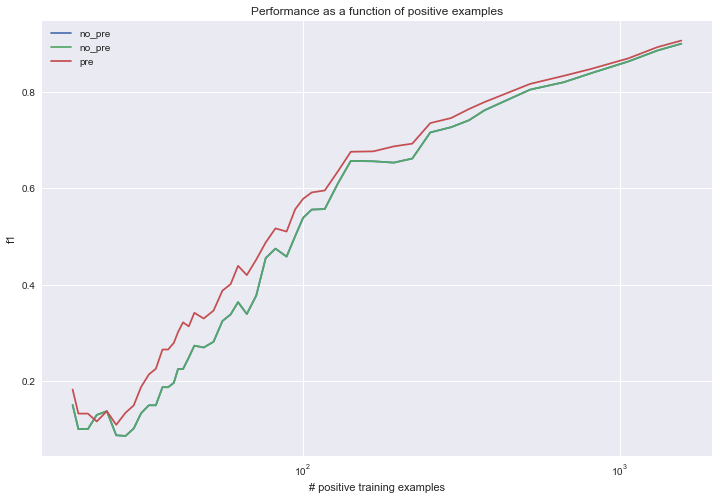

In [389]:
def plot_rolling_mean(tempdf):
    tempdf = tempdf.sort_values('size')
    x,y = tempdf['size'],tempdf['f1']
    x,y = pd.rolling_mean(x,window=10,center=True),pd.rolling_mean(y,window=10,center=True)
    plt.plot(x,y,label=tempdf['type'].values[0])
plt.figure(figsize=(12,8))
performance_df.groupby('type').apply(plot_rolling_mean)

plt.legend()
plt.title('Performance as a function of positive examples')
plt.xscale('log')
plt.ylabel('f1')
plt.xlabel('# positive training examples')

Here we see that the gain decreases as the number of examples present in the training data decreases. Suggesting that it is useful for rare classes.

# Comparison to Bag of Word Models
Here we will expect to see a gain especially in terms of learning curve, but also in many cases on the overall performance.

However the dataset has a few percularities in the categorization. For instance a classifier should learn to differentiate between documents about wheat and documents about corn. However one might expect that agricultural products will be very close in vector space, and that 300 dimensions will probably be a little small to encode a large difference between the two, making it hard for a model dependent only on the embedding and not the BoW. 


In [434]:
#train_docs[2938]  #'wheat'

In [435]:
#train_docs[3074] #'corn'

In [441]:
#train_docs[4823] #'earn'
#train_docs[7353] #'earn'

'BENGUET CORP &lt;BE> CALENDAR 1986\n  Net income 154.7 mln pesos vs 127.5 mln\n      Operating revenues 4.42 billion vs 3.3 billion\n      Operating profit 621.2 mln vs 203.4 mln\n      Earnings per share 4.80 vs 3.95\n      NOTE: Company statement said gold operations contributed 74\n  pct of consolidated earnings.\n  \n\n'

## Learning curves
Here we want to investigate if the Doc2Vec based models can learn faster, than BoW based models like SVM and Naive Bayes.


In theory the density of the embedding models should be better than, but it might also depend on the task:

* Is the classification task related to what a context predicting model like Word2Vec and Doc2Vec? 
    - Are the embeddings granular enough, that it differentiates strongly between Corn and Wheat?

* Is the input short (i.e. text snippets) or long, 
    * The SVM model will be helped by longer snippets, i.e. less sparsity in the document vector. (Wang and Manning 2015)
 

In [393]:
test_results = []

### Doc2vec learning curve

In [604]:
import time
for name,x in [('with_pretrained',x_pre),('no_pretrained',x_no_pre)]:
    xtrain = np.array(x[0:len(train_docs)])
    xtest = np.array(x[len(train_docs):len(docs)])
    
    for y_col in tqdm.tqdm(y_df_train.sum().sort_values().keys()[-50:]):
        y_train = y_df_train[y_col].values
        print(y_col)
        for size in range(100,len(y_train)+100,100):
            clf = sklearn.linear_model.LogisticRegression()
            ### train classifier
            # Pick random sample
            idx = random.sample(list(range(len(xtrain))),min([len(y_train),size]))
            temp_train = xtrain[idx]
            temp_y = y_train[idx]
            while sum(temp_y)<2:
                print('-',end='')
                idx = random.sample(list(range(len(xtrain))),min([len(y_train),size]))
                temp_train = xtrain[idx]
                temp_y = y_train[idx]
            # log train time
            t = time.time()
            clf.fit(temp_train,temp_y)
            train_time = time.time()-t
            t = time.time()
            # test classifier
            y_test = y_df_test[y_col]
            pred = clf.predict(xtest)
            # log inference time
            infer_time = time.time() - t 
            datapoint = {'train_time':train_time,'infer_time':infer_time,
                         'training_size':size,
                         'type':name,'task':y_col,'positive_samples':sum(y_train)}
            perf_test = get_performance(pred,y_test)
            pred = clf.predict(temp_train)
            perf_train = get_performance(pred,temp_y,prefix='train_')
            datapoint.update(perf_train)
            datapoint.update(perf_test)
            test_results.append(datapoint)



  0%|          | 0/40 [00:00<?, ?it/s]

orange
----------------

/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


--------


Exception in thread Thread-1340:
Traceback (most recent call last):
  File "/Users/axelengbergpallesen/anaconda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/axelengbergpallesen/anaconda/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

  2%|▎         | 1/40 [01:16<49:44, 76.53s/it]

strategic-metal
-----------------------------

  5%|▌         | 2/40 [02:21<44:54, 70.91s/it]

hog
---------------------------------------------------------------------------------------------------------------------------------

  8%|▊         | 3/40 [03:47<46:50, 75.96s/it]

rapeseed
-------------------------------------------------------------------------

 10%|█         | 4/40 [05:12<46:54, 78.18s/it]

tin
--------------------------------------------------------

 12%|█▎        | 5/40 [06:22<44:40, 76.59s/it]

wpi
------------------------------------------------------

 15%|█▌        | 6/40 [07:06<40:17, 71.10s/it]

pet-chem
-----------------------------------------------

 18%|█▊        | 7/40 [07:51<37:03, 67.37s/it]

silver
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

 20%|██        | 8/40 [08:55<35:43, 67.00s/it]

zinc
----------------------------------------

 22%|██▎       | 9/40 [09:46<33:40, 65.18s/it]

retail
----------------

 25%|██▌       | 10/40 [10:33<31:40, 63.35s/it]

sorghum
----------------------------------------------------------

 28%|██▊       | 11/40 [11:19<29:52, 61.81s/it]

meal-feed
------

 30%|███       | 12/40 [12:08<28:18, 60.68s/it]

palm-oil
-----------------------------------------------

 32%|███▎      | 13/40 [12:58<26:57, 59.91s/it]

rice
------

 35%|███▌      | 14/40 [14:43<27:21, 63.13s/it]

alum
-----------------------------------

 38%|███▊      | 15/40 [17:21<28:56, 69.45s/it]

gas
------------------

 40%|████      | 16/40 [19:26<29:09, 72.92s/it]

rubber
------------------------

 42%|████▎     | 17/40 [21:15<28:45, 75.02s/it]

barley
-----------------

 45%|████▌     | 18/40 [23:42<28:58, 79.03s/it]

cotton
----------

 48%|████▊     | 19/40 [25:38<28:19, 80.95s/it]

iron-steel
-------

 50%|█████     | 20/40 [27:27<27:27, 82.36s/it]

ipi
-------------

 52%|█████▎    | 21/40 [28:34<25:51, 81.65s/it]

yen
-----------------

 55%|█████▌    | 22/40 [30:08<24:39, 82.22s/it]

jobs
--------

 57%|█████▊    | 23/40 [32:15<23:50, 84.14s/it]

copper
--------

 60%|██████    | 24/40 [33:57<22:38, 84.91s/it]

carcass
----------

 62%|██████▎   | 25/40 [35:16<21:10, 84.67s/it]

cocoa
---

 65%|██████▌   | 26/40 [36:16<19:31, 83.70s/it]

reserves
------------------

 68%|██████▊   | 27/40 [37:28<18:02, 83.28s/it]

cpi
-

 70%|███████   | 28/40 [38:50<16:38, 83.24s/it]

bop
-----

 72%|███████▎  | 29/40 [40:13<15:15, 83.21s/it]

nat-gas
--------

 75%|███████▌  | 30/40 [42:04<14:01, 84.16s/it]

livestock
--------

 78%|███████▊  | 31/40 [43:56<12:45, 85.06s/it]

soybean


 80%|████████  | 32/40 [46:44<11:41, 87.63s/it]

veg-oil
---

 82%|████████▎ | 33/40 [48:29<10:17, 88.18s/it]

gold


 85%|████████▌ | 34/40 [50:07<08:50, 88.47s/it]

gnp
--------

 88%|████████▊ | 35/40 [51:28<07:21, 88.23s/it]

coffee


 90%|█████████ | 36/40 [53:01<05:53, 88.38s/it]

oilseed


 92%|█████████▎| 37/40 [54:46<04:26, 88.82s/it]

sugar


 95%|█████████▌| 38/40 [56:13<02:57, 88.78s/it]

dlr


 98%|█████████▊| 39/40 [57:44<01:28, 88.83s/it]

money-supply
-

  0%|          | 0/40 [00:00<?, ?it/s]

orange
-------------------------------------------------------------------------------------------------

  2%|▎         | 1/40 [01:51<1:12:19, 111.27s/it]

strategic-metal
--------------------------------------------

  5%|▌         | 2/40 [04:37<1:27:48, 138.65s/it]

hog
--------------------------------------------------

  8%|▊         | 3/40 [07:07<1:27:52, 142.49s/it]

rapeseed
-----------------------------------------------------------------------------------------------------------------------------------------------------

 10%|█         | 4/40 [08:12<1:13:51, 123.09s/it]

tin
-------------------------------------------------------------------------------------------

 12%|█▎        | 5/40 [09:18<1:05:06, 111.62s/it]

wpi
------------------------------------------------------------------

 15%|█▌        | 6/40 [10:27<59:16, 104.59s/it]  

pet-chem
--------------------------------------------------------------

 18%|█▊        | 7/40 [11:36<54:43, 99.51s/it] 

silver
-------------------

 20%|██        | 8/40 [12:44<50:58, 95.58s/it]

zinc
-------------------------------------------------

 22%|██▎       | 9/40 [14:18<49:16, 95.38s/it]

retail
------------------------------------------------------------

 25%|██▌       | 10/40 [15:30<46:32, 93.09s/it]

sorghum
----------------------------------------------------------------------

 28%|██▊       | 11/40 [16:39<43:54, 90.84s/it]

meal-feed
-----------------

 30%|███       | 12/40 [17:58<41:55, 89.86s/it]

palm-oil
---------------------------------------------------

 32%|███▎      | 13/40 [19:09<39:48, 88.46s/it]

rice
-------------------------

 35%|███▌      | 14/40 [20:51<38:44, 89.42s/it]

alum
--------------

 38%|███▊      | 15/40 [22:04<36:47, 88.29s/it]

gas
---------

 40%|████      | 16/40 [23:20<35:01, 87.54s/it]

rubber
-----------

 42%|████▎     | 17/40 [24:32<33:12, 86.63s/it]

barley
-------------------------

 45%|████▌     | 18/40 [25:46<31:29, 85.89s/it]

cotton
------

 48%|████▊     | 19/40 [26:52<29:42, 84.89s/it]

iron-steel
--------------

 50%|█████     | 20/40 [28:04<28:04, 84.24s/it]

ipi
---------------------

 52%|█████▎    | 21/40 [29:23<26:35, 83.99s/it]

yen
--------

 55%|█████▌    | 22/40 [30:46<25:10, 83.93s/it]

jobs
-----

 57%|█████▊    | 23/40 [32:08<23:45, 83.87s/it]

copper
------------

 60%|██████    | 24/40 [33:30<22:20, 83.76s/it]

carcass
---------------------------------

 62%|██████▎   | 25/40 [34:51<20:54, 83.66s/it]

cocoa
----

 65%|██████▌   | 26/40 [36:07<19:27, 83.37s/it]

reserves
--------

 68%|██████▊   | 27/40 [37:29<18:03, 83.32s/it]

cpi
--

 70%|███████   | 28/40 [39:17<16:50, 84.20s/it]

bop
-----

 72%|███████▎  | 29/40 [40:41<15:25, 84.18s/it]

nat-gas
-

 75%|███████▌  | 30/40 [42:00<14:00, 84.00s/it]

livestock
-------

 78%|███████▊  | 31/40 [43:18<12:34, 83.83s/it]

soybean
--

 80%|████████  | 32/40 [44:38<11:09, 83.70s/it]

veg-oil
-----

 82%|████████▎ | 33/40 [45:58<09:45, 83.59s/it]

gold
-

 85%|████████▌ | 34/40 [47:08<08:19, 83.19s/it]

gnp
-------

 88%|████████▊ | 35/40 [48:24<06:54, 82.99s/it]

coffee
--

 90%|█████████ | 36/40 [49:40<05:31, 82.80s/it]

oilseed
-

 92%|█████████▎| 37/40 [51:07<04:08, 82.92s/it]

sugar


 95%|█████████▌| 38/40 [52:28<02:45, 82.86s/it]

dlr


 98%|█████████▊| 39/40 [53:51<01:22, 82.86s/it]

money-supply
-

100%|██████████| 40/40 [55:35<00:00, 83.40s/it]


### NB and SVM learning curves

In [396]:
import sklearn.naive_bayes
from sklearn import svm
classifiers = {'svm':svm.LinearSVC,'nb':sklearn.naive_bayes.BernoulliNB}


In [397]:
conf = {**default,**{'lemmer':True}}
tokenizer = custom_tokenizer(**conf)

In [253]:
gram = 2
vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,gram),min_df=3,tokenizer=tokenizer.tokenize)
# load documents
vectorizer.fit(train_docs)
n_features = len(vectorizer.vocabulary_)
x_bow_train = vectorizer.transform(train_docs)
x_bow_test = vectorizer.transform(test_docs)

In [619]:
xtrain = x_bow_train
xtest = x_bow_test
for y_col in tqdm.tqdm(y_df_train.sum().sort_values().keys()[-50:-10]):
    y_train = y_df_train[y_col].values
    print(y_col)
    for classifier in classifiers:
        for size in range(100,len(y_train)+100,100):
            clf = classifiers[classifier]()
            ### train classifier
            # Pick random sample
            idx = random.sample(list(range(xtrain.shape[0])),min([len(y_train),size]))
            temp_train = xtrain[idx]
            temp_y = y_train[idx]
            while sum(temp_y)<2:
                print('-',end='')
                idx = random.sample(list(range(xtrain.shape[0])),min([len(y_train),size]))
                temp_train = xtrain[idx]
                temp_y = y_train[idx]

            # log train time
            t = time.time()
            clf.fit(temp_train,temp_y)
            train_time = time.time()-t
            t = time.time()
            # test classifier
            y_test = y_df_test[y_col]
            pred = clf.predict(xtest)
            # log inference time
            infer_time = time.time() - t 
            datapoint = {'train_time':train_time,'infer_time':infer_time,
                         'training_size':size,
                         'type':classifier,'task':y_col,'positive_samples':sum(y_train)}
            perf_test = get_performance(pred,y_test)
            pred = clf.predict(temp_train)
            perf_train = get_performance(pred,temp_y,prefix='train_')
            datapoint.update(perf_train)
            datapoint.update(perf_test)
            test_results.append(datapoint)


  0%|          | 0/40 [00:00<?, ?it/s]

orange
--------------------------------------------------------------------------

/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  2%|▎         | 1/40 [00:25<16:53, 25.99s/it]

strategic-metal
-------------------------------------------------------------------------------------------------------------------------------------------------------------

  5%|▌         | 2/40 [01:11<22:44, 35.90s/it]

hog
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  8%|▊         | 3/40 [01:44<21:23, 34.68s/it]

rapeseed
-----------------------------------------------------------------------------------------------------

 10%|█         | 4/40 [02:20<21:01, 35.03s/it]

tin
------------------------------------------------------------------------------------------

 12%|█▎        | 5/40 [03:04<21:31, 36.90s/it]

wpi
------------------------------------------------------------------------------------------------------------------

 15%|█▌        | 6/40 [03:36<20:26, 36.09s/it]

pet-chem
------------------------------------------------------

 18%|█▊        | 7/40 [04:28<21:05, 38.35s/it]

silver
------------------------------------------------------------------------------------------------------------------------------------

 20%|██        | 8/40 [05:30<22:00, 41.25s/it]

zinc
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

 22%|██▎       | 9/40 [06:14<21:28, 41.56s/it]

retail
--------------------------------------------------------------------------------

 25%|██▌       | 10/40 [06:47<20:23, 40.78s/it]

sorghum
--------------------------------------------

 28%|██▊       | 11/40 [07:22<19:25, 40.18s/it]

meal-feed
--------------------------------------

 30%|███       | 12/40 [07:58<18:37, 39.91s/it]

palm-oil
------------------------------------------------

 32%|███▎      | 13/40 [08:46<18:13, 40.51s/it]

rice
-----------------------------

 35%|███▌      | 14/40 [09:22<17:24, 40.16s/it]

alum
--------------

 38%|███▊      | 15/40 [10:16<17:07, 41.09s/it]

gas
-------------------------------------------

 40%|████      | 16/40 [10:44<16:07, 40.30s/it]

rubber
----------------------------

 42%|████▎     | 17/40 [11:17<15:16, 39.83s/it]

barley
----------------------------------

 45%|████▌     | 18/40 [11:45<14:22, 39.21s/it]

cotton
----------------------------------------

 48%|████▊     | 19/40 [12:11<13:28, 38.49s/it]

iron-steel
---------------------------

 50%|█████     | 20/40 [12:40<12:40, 38.04s/it]

ipi
-----------------

 52%|█████▎    | 21/40 [13:20<12:04, 38.13s/it]

yen
--------------------

 55%|█████▌    | 22/40 [14:44<12:03, 40.22s/it]

jobs
--------------------------

 57%|█████▊    | 23/40 [15:27<11:25, 40.32s/it]

copper
-------------------------------

 60%|██████    | 24/40 [16:09<10:46, 40.40s/it]

carcass
-----------------------

 62%|██████▎   | 25/40 [17:00<10:12, 40.81s/it]

cocoa
-------------------

 65%|██████▌   | 26/40 [17:42<09:32, 40.87s/it]

reserves
----------------------

 68%|██████▊   | 27/40 [18:27<08:53, 41.02s/it]

cpi
------

 70%|███████   | 28/40 [19:06<08:11, 40.96s/it]

bop
------

 72%|███████▎  | 29/40 [20:03<07:36, 41.49s/it]

nat-gas
---

 75%|███████▌  | 30/40 [20:59<06:59, 41.99s/it]

livestock
---------------

 78%|███████▊  | 31/40 [21:43<06:18, 42.05s/it]

soybean
------------

 80%|████████  | 32/40 [23:22<05:50, 43.83s/it]

veg-oil


 82%|████████▎ | 33/40 [24:00<05:05, 43.65s/it]

gold
--------

 85%|████████▌ | 34/40 [24:36<04:20, 43.42s/it]

gnp
----------

 88%|████████▊ | 35/40 [25:16<03:36, 43.33s/it]

coffee
-----

 90%|█████████ | 36/40 [25:51<02:52, 43.09s/it]

oilseed
-

 92%|█████████▎| 37/40 [26:20<02:08, 42.73s/it]

sugar
-------

 95%|█████████▌| 38/40 [27:05<01:25, 42.77s/it]

dlr
--

 98%|█████████▊| 39/40 [27:37<00:42, 42.49s/it]

money-supply


100%|██████████| 40/40 [28:01<00:00, 42.03s/it]


In [620]:
test_df = pd.DataFrame(test_results)

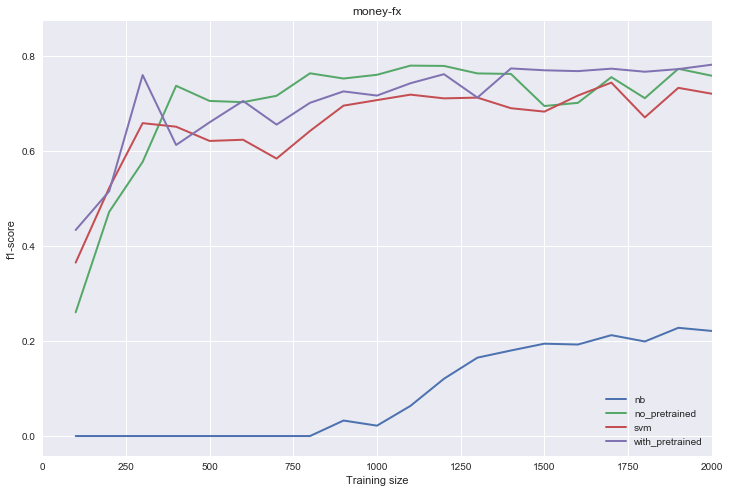

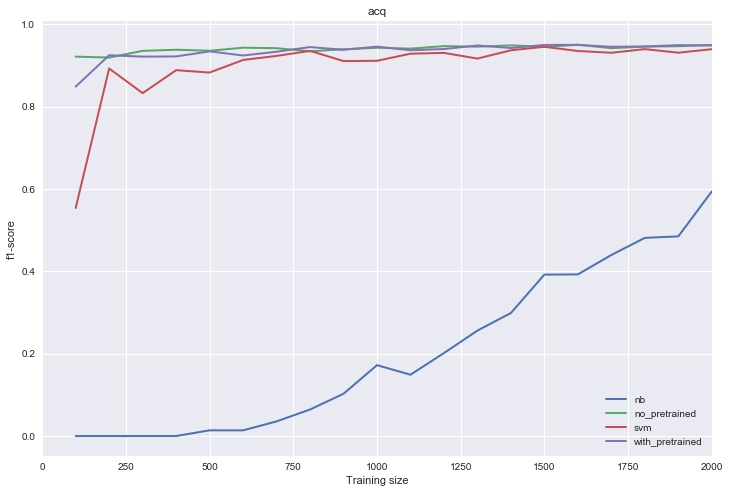

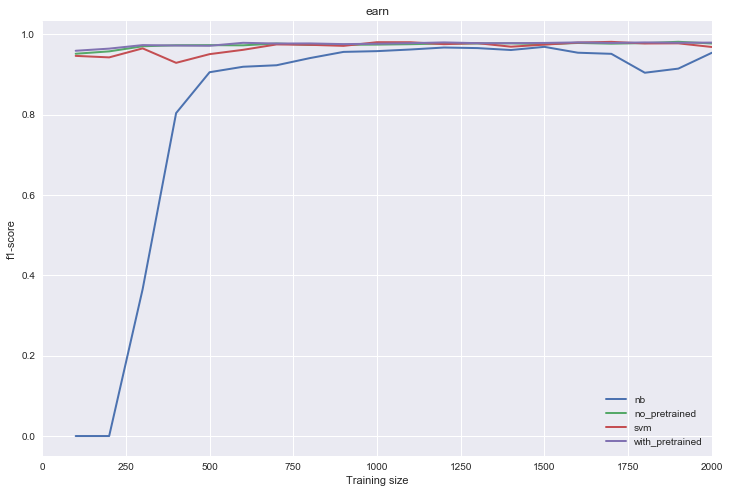

In [440]:
for task in set(['acq','earn','money-fx']):#:test_df.task.unique()
    
    plt.figure(figsize=(12,8))
    for name,temp in test_df[test_df['task']==task].groupby('type'):
        temp = temp.sort_values('training_size')
        plt.plot(temp['training_size'],temp['f1'],label=name,lw=2)
    plt.legend()
    plt.ylabel('f1-score')
    plt.xlabel('Training size')
    plt.title(task)
    plt.xlim(0,2000)

While the SVM far outperforms the Naive Bayes with a very steep learning curve, the doc2vec embeddings are consistently better at these 3 tasks.

In [621]:
max_df = test_df.groupby(['type','task']).max().reset_index()
max_df = max_df.merge(pd.DataFrame(list(y_df_train.sum().items()),columns=['task','size']),on='task')
# Plus Merge with the topic model best performance.
max_df = pd.concat([max_df,lda_top])

In [ ]:
# Dump results
max_df.to_csv('best_performance.csv',index=False)
test_df.to_csv('learning_curves.csv',index=False)

/Users/axelengbergpallesen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=True).mean()
  after removing the cwd from sys.path.


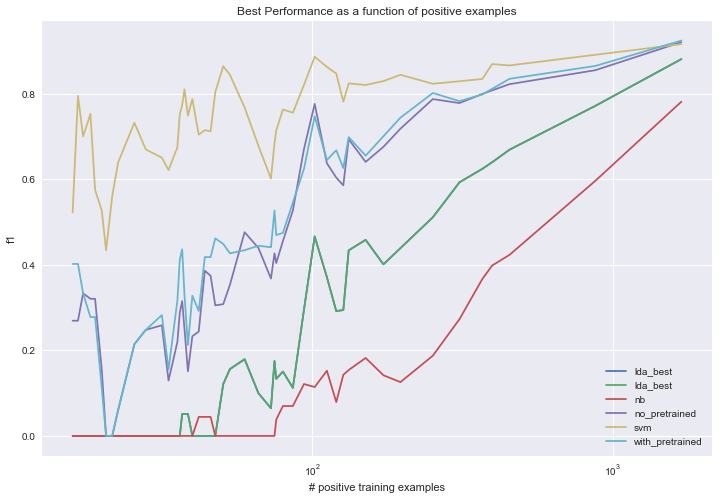

In [624]:
def plot_rolling_mean(tempdf,window=3):
    tempdf = tempdf.sort_values('size')
    x,y = tempdf['size'],tempdf['f1']
    x,y = pd.rolling_mean(x,window=window,center=True),pd.rolling_mean(y,window=window,center=True)
    plt.plot(x,y,label=tempdf['type'].values[0])
plt.figure(figsize=(12,8))
max_df.groupby('type').apply(plot_rolling_mean)

plt.legend()
plt.title('Best Performance as a function of positive examples')
plt.xscale('log')
plt.ylabel('f1')
plt.xlabel('# positive training examples')

Here we can see that the Latent Dirichlet Allocation is a far slower learner than the doc2vec with no pretrained embedddings. However for most tasks SVM with bigram features is superior.